#Procesamiento de datos del Visound
Esta rutina procesa y visualiza los datos que se generan con el programa visound.
La app va subiendo los datos a un servidor. Este servidor corre en una virtual machine en la compu de casa sobre un ubuntu server en el que instale un json-server. 
Esta rutina descarga los datos del servidor en su ultima version y los procesa para hacer una visualizacion de la actividad de los usuarios en forma grafica (un timeline de la actividad)

In [1]:
%matplotlib inline
from IPython import embed
from IPython.display import display
from Scripts import *
from graficos import *
from load import *
from DownloadFile import *

# Recoleccion de datos

Bajamos la ultima version del archivo de internet y nos fijamos de guardar la version anterior con una marca temporal

In [6]:
DownloadFile ()

In [2]:
touchs, sounds = load()

# Con los datos ya cargados graficamos los resultados

La idea de esta seccion es hacer un analisis visual de los datos. Para eso vamos a armar un timeline donde vamos a mostrar con dibujos (lines, rectangulos, etc) lo que va pasando en el juego en funcion de diferentes criterios. Para un usuario cuando jugo, en usa sesion que paso, etc.

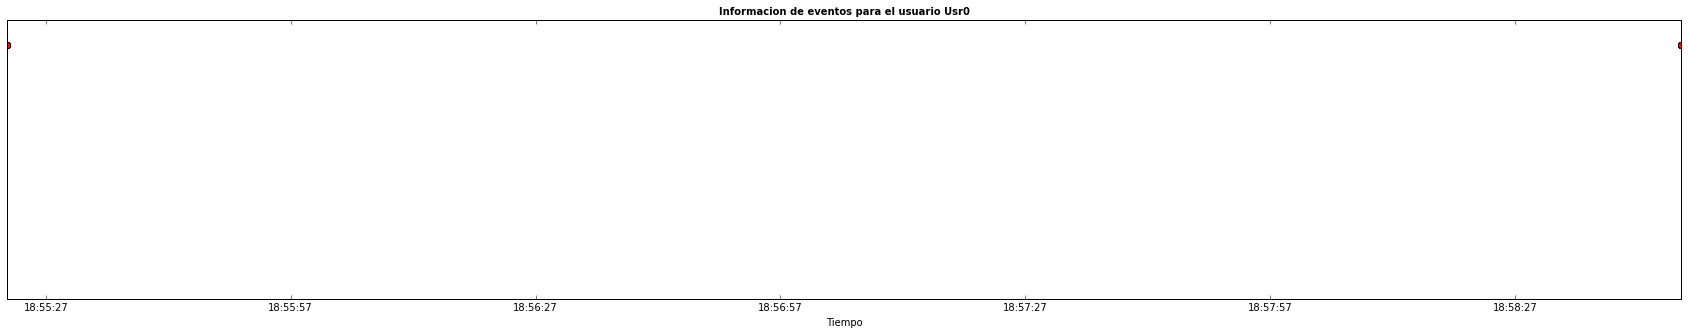

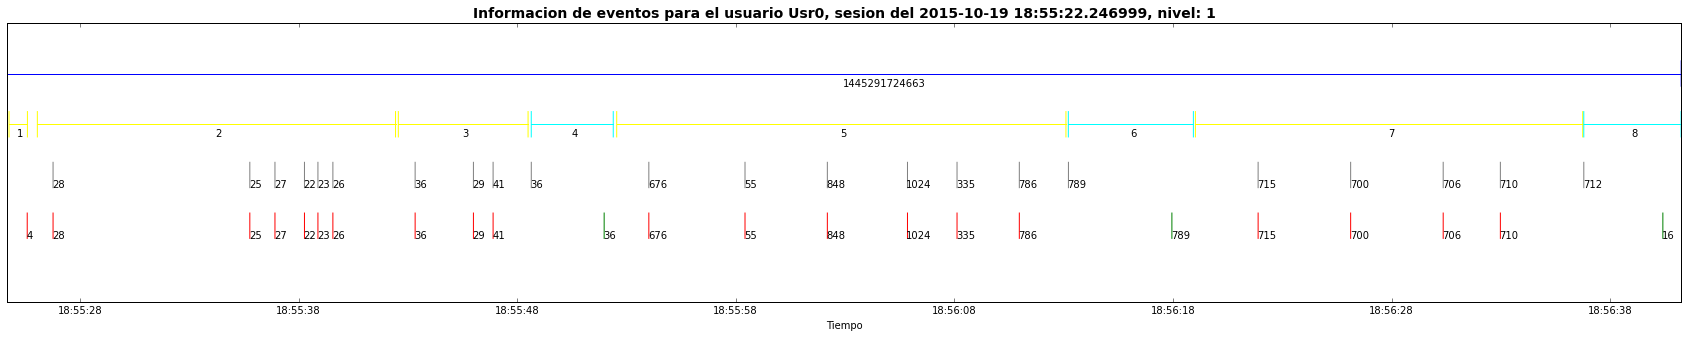

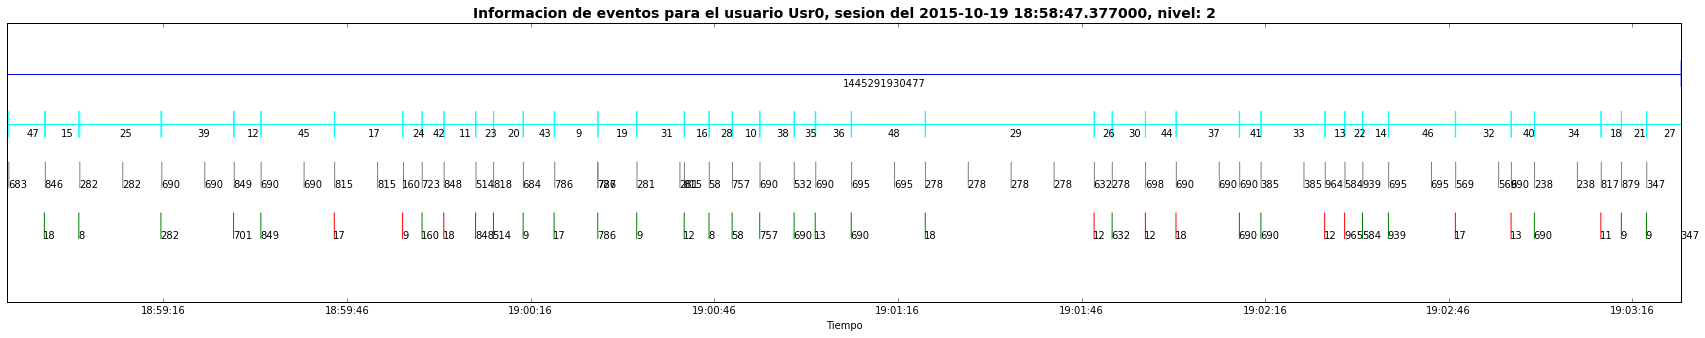

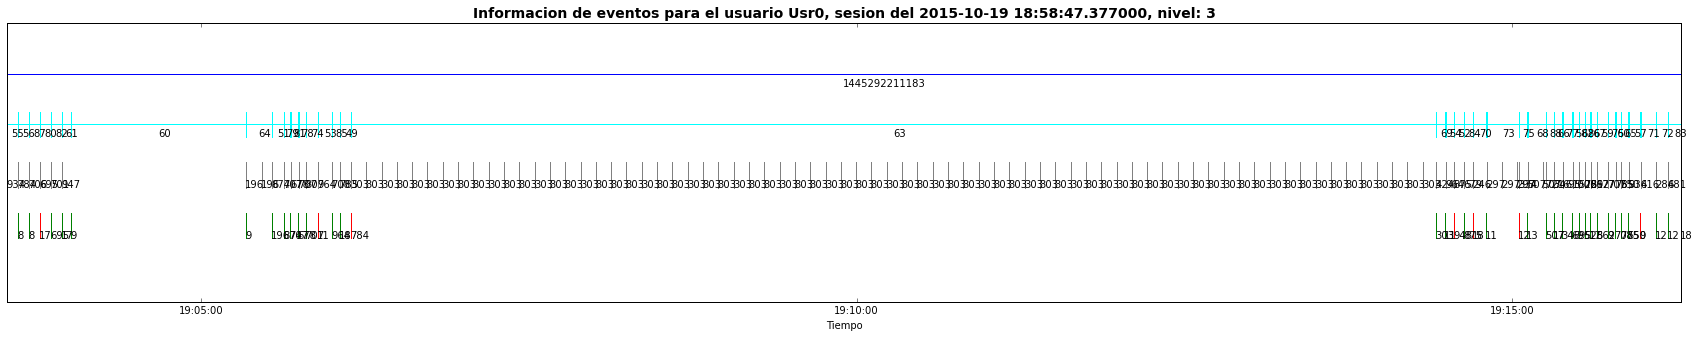

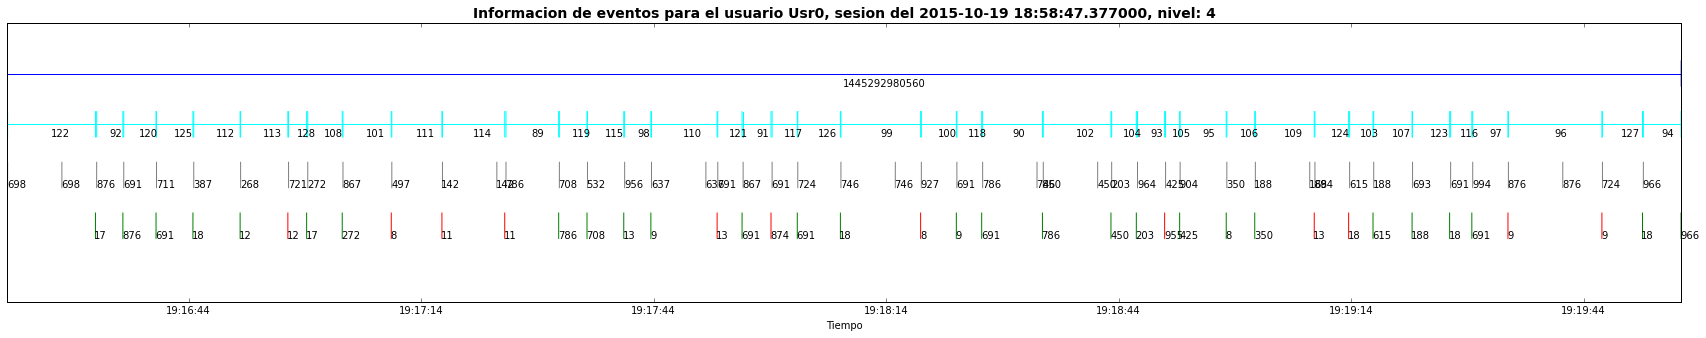

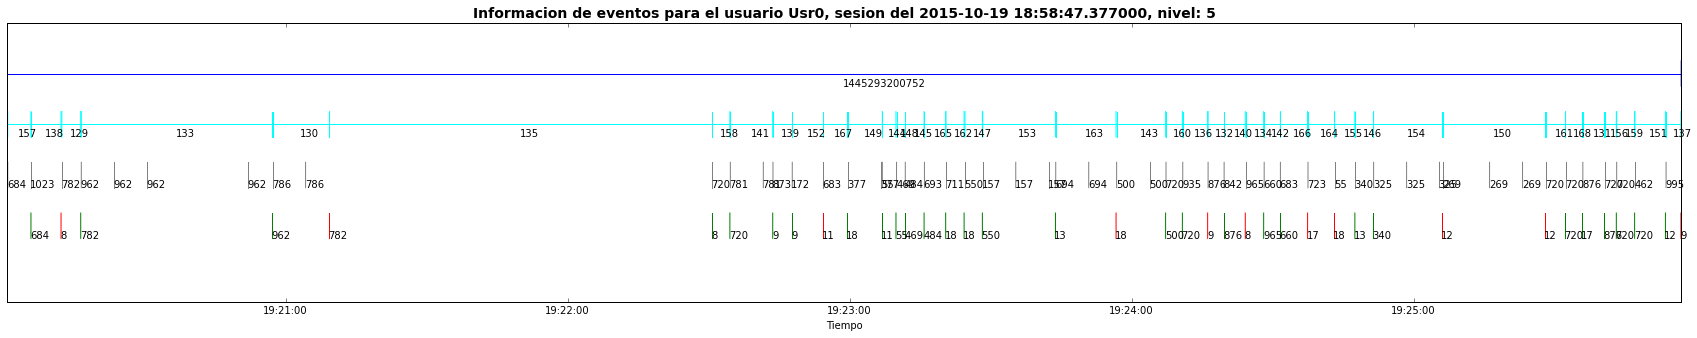

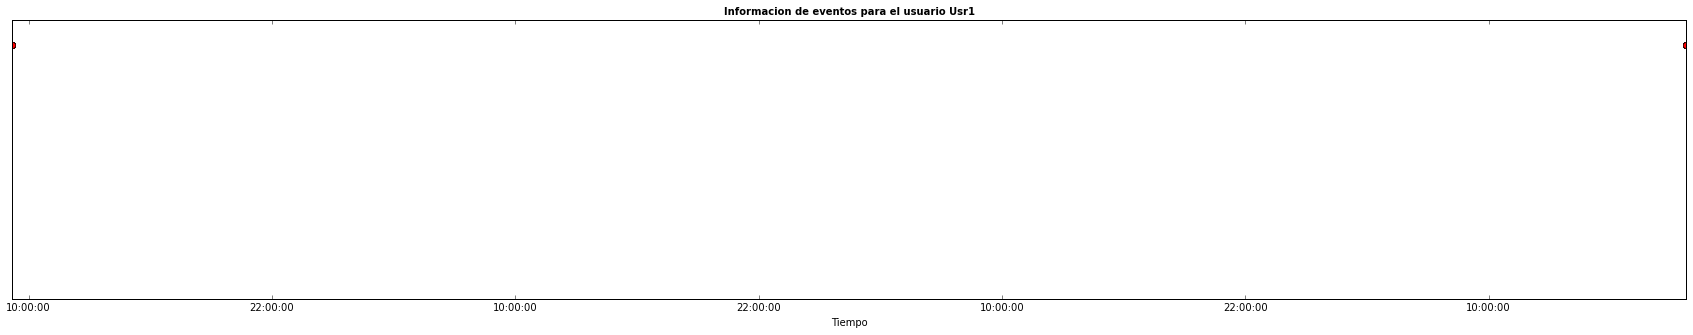

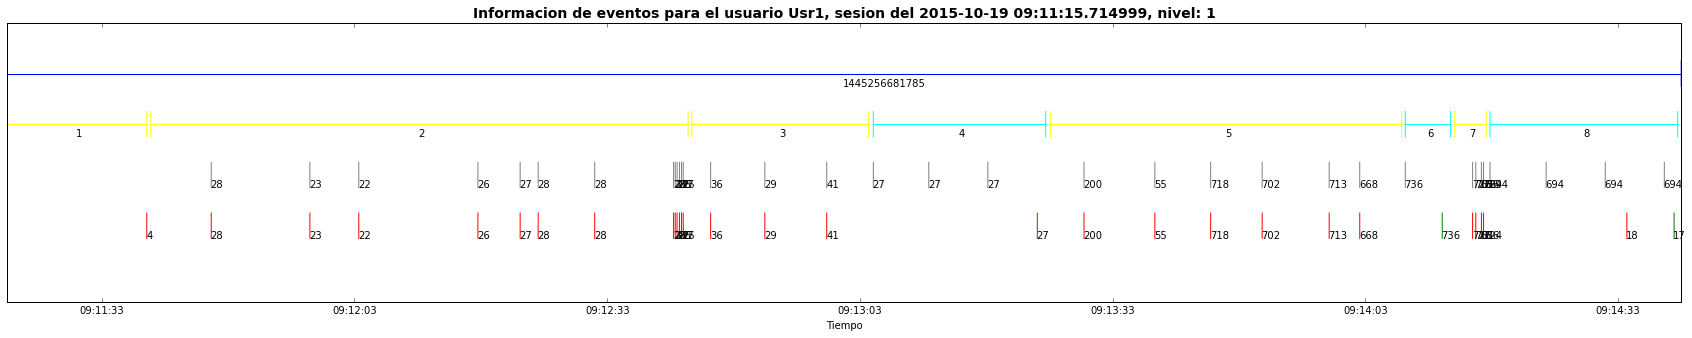

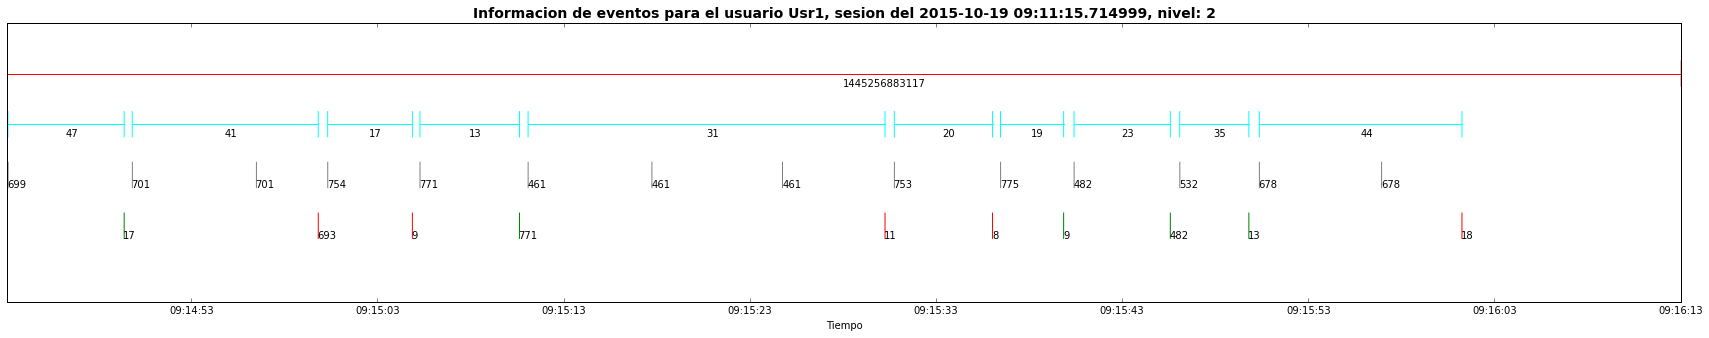

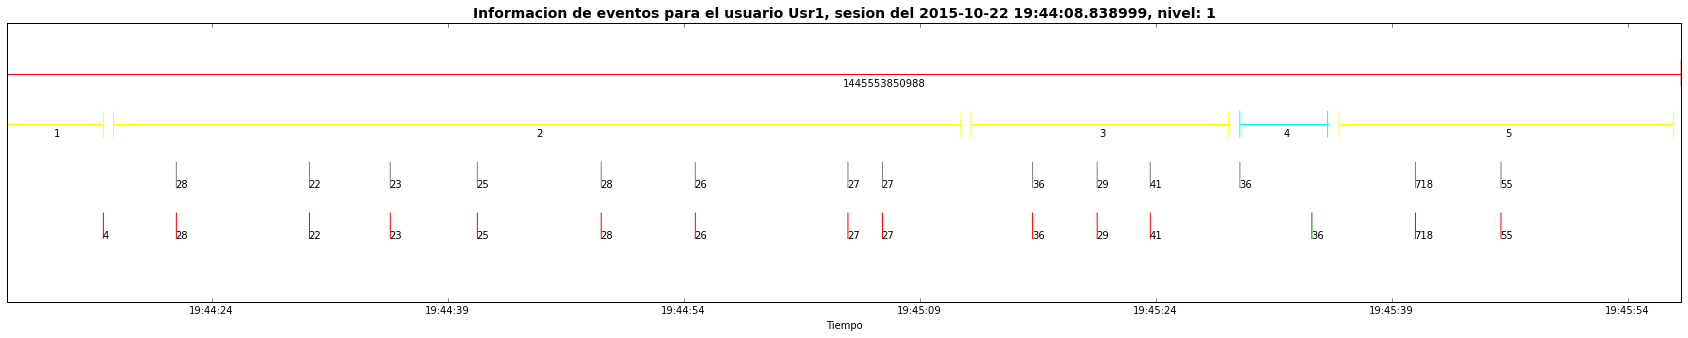

In [4]:
makeTimeline (touchs, sounds)

# Cosas de estadistica

En esta seccion se va a hacer un procesamiento estidistico de los datos para evaluar los resultados en funcion de diferentes parametros.


'Se hara la estadistica del usuario: Usr0'

'El usuario Usr0 jugo 2 veces'

'En la session 2015-10-19 18:55:22.246999 el usuario Usr0 jugo 1 niveles'

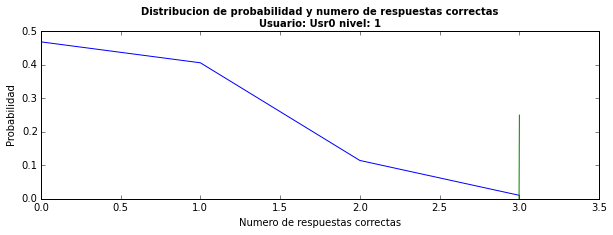

'En la session 2015-10-19 18:58:47.377000 el usuario Usr0 jugo 4 niveles'

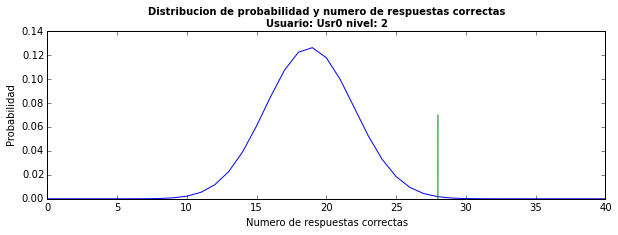

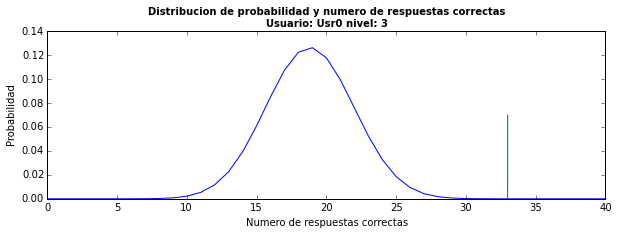

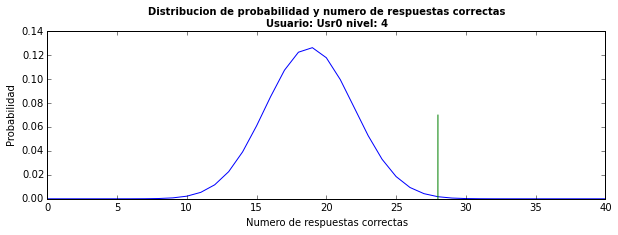

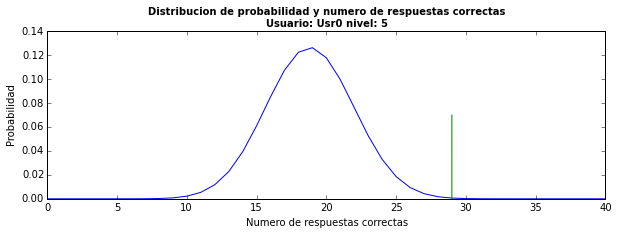

'Se hara la estadistica del usuario: Usr1'

'El usuario Usr1 jugo 2 veces'

'En la session 2015-10-19 09:11:15.714999 el usuario Usr1 jugo 2 niveles'

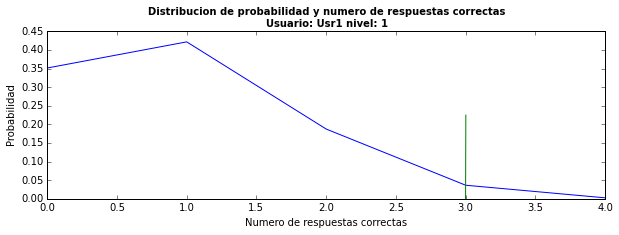

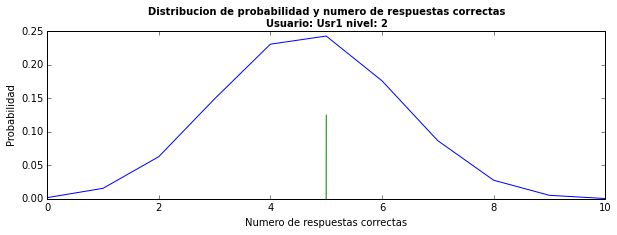

'En la session 2015-10-22 19:44:08.838999 el usuario Usr1 jugo 1 niveles'

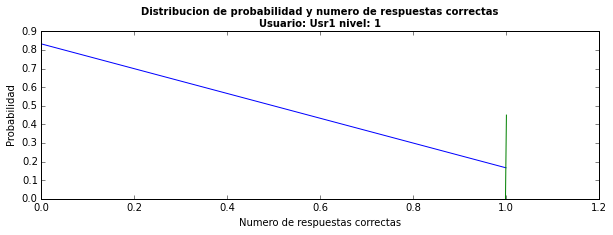

In [33]:
from Scripts import fechaLocal
from Scripts import makeHistogramaTrials
from Scripts import distribucionDeProbabilidadRandom
import matplotlib.pyplot as plt

for usuario in touchs['Alias'].unique():
    display ('Se hara la estadistica del usuario: '+usuario)
    touchsUsuario = touchs[touchs['Alias']==usuario]
    display ('El usuario '+usuario+' jugo '+str(len(touchsUsuario['sessionInstance'].unique()))+' veces')
    for session in touchsUsuario['sessionInstance'].unique():
        touchsSession = touchsUsuario[touchsUsuario['sessionInstance']==session]
        # Analizamos los datos para dificultad generica
        display ('En la session '+ str(fechaLocal(session))+ ' el usuario '+str(usuario)+' jugo '+str(len(touchsSession['levelInstance'].unique())) + ' niveles')
        for level in touchsSession['levelInstance'].unique():
            
            touchsLevel = touchsSession[touchsSession['levelInstance']==level]
            levelInfo = touchsLevel.iloc[0]
            touchsLevelTest = touchsLevel[touchsLevel['tipoDeTrial']=='TEST']
            histograma = makeHistogramaTrials(touchsLevelTest)
            distribucion = distribucionDeProbabilidadRandom(histograma)
            # Armamos el grafico
            fig = plt.figure(figsize=(10,3))
            ax = fig.add_subplot(111)
            title = 'Distribucion de probabilidad y numero de respuestas correctas \n' + 'Usuario: '+str(usuario) + ' nivel: ' + str(levelInfo['levelId'])
            ax.set_title(title, fontsize=10, fontweight='bold')
            ax.set_xlabel('Numero de respuestas correctas')
            ax.set_ylabel('Probabilidad')
            x = range(len(distribucion))
            y = distribucion
            ax.plot(x,y)

            # Ahora agregamos la marca del numero obtenido, para eso primero hay que calcularlo
            aciertos = len(touchsLevelTest[touchsLevelTest['isTrue']==True])
            x=[aciertos-0.001,aciertos+0.001]        
            y=[0,ax.get_ylim()[1]/2]
            color = 'green'
            ax.plot(x,y,color)
            plt.show()
            
        # Analizamos los datos segun dificultad
        display ('En la session '+ str(fechaLocal(session))+ ' el usuario '+str(usuario)+' jugo '+str(len(touchsSession['levelInstance'].unique())) + ' niveles')
        for level in touchsSession['levelInstance'].unique():
            
            touchsLevel = touchsSession[touchsSession['levelInstance']==level]
            levelInfo = touchsLevel.iloc[0]
            touchsLevelTest = touchsLevel[touchsLevel['tipoDeTrial']=='TEST']
            histograma = makeHistogramaTrials(touchsLevelTest)
            distribucion = distribucionDeProbabilidadRandom(histograma)
            # Armamos el grafico
            fig = plt.figure(figsize=(10,3))
            ax = fig.add_subplot(111)
            title = 'Distribucion de probabilidad y numero de respuestas correctas \n' + 'Usuario: '+str(usuario) + ' nivel: ' + str(levelInfo['levelId'])
            ax.set_title(title, fontsize=10, fontweight='bold')
            ax.set_xlabel('Numero de respuestas correctas')
            ax.set_ylabel('Probabilidad')
            x = range(len(distribucion))
            y = distribucion
            ax.plot(x,y)

            # Ahora agregamos la marca del numero obtenido, para eso primero hay que calcularlo
            aciertos = len(touchsLevelTest[touchsLevelTest['isTrue']==True])
            x=[aciertos-0.001,aciertos+0.001]        
            y=[0,ax.get_ylim()[1]/2]
            color = 'green'
            ax.plot(x,y,color)
            plt.show()
            
            
            
        

In [9]:
display ('Tocuhs')
display (touchs.columns)
display ('Sounds')
display (sounds.columns)

'Tocuhs'

Index(['categoriasTouched', 'idResourceTouched', 'isTrue', 'touchInstance',
       'trialInstance', 'categoriasElementos', 'categoriasEstimulo',
       'categoriasRta', 'idRtaCorrecta', 'levelInstance', 'resourcesIdSort',
       'timeTrialExit', 'timeTrialStart', 'tipoDeTrial', 'trialCompleted',
       'trialId', 'trialTitle', 'levelCompleted', 'levelId', 'levelTitle',
       'sessionInstance', 'timeLevelExit', 'timeLevelStarts', 'userID',
       'Alias'],
      dtype='object')

'Sounds'

Index(['trialInstance', 'soundSourceId', 'soundInstance',
       'categoriasElementos', 'categoriasEstimulo', 'categoriasRta',
       'idRtaCorrecta', 'levelInstance', 'resourcesIdSort', 'timeTrialExit',
       'timeTrialStart', 'tipoDeTrial', 'trialCompleted', 'trialId',
       'trialTitle', 'levelCompleted', 'levelId', 'levelTitle',
       'sessionInstance', 'timeLevelExit', 'timeLevelStarts', 'userID',
       'Alias'],
      dtype='object')